# Course 2: Python Project 04


## PART I: EDA & Data Preprocessing on Google App Store Rating Dataset.


- Mohammed Toufiq


### 1. Import required libraries and read the dataset.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:\\Users\\TOFIQ\\Downloads\\Apps_data+(1).csv')

###  2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [3]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [6]:
print(data.describe())
print('Columns that need to be worked upon:')
print('-'*40)
print('Category')
print('Reviews')
print('Size')
print('Installs')
print('Price')

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
Columns that need to be worked upon:
----------------------------------------
Category
Reviews
Size
Installs
Price


### 4. Check if there are any duplicate records in the dataset? if any drop them

In [7]:
print("Number of duplicate records:",data.duplicated().sum())
data.drop_duplicates(inplace=True)

Number of duplicate records: 483


### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [8]:
print("Unique categories:",data["Category"].unique())
invalid_categories=["1.9"]
data=data[~data["Category"].isin(invalid_categories)]
data["Category"].unique()

Unique categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [9]:
print("Number of missing values in Rating column:",data["Rating"].isnull().sum())
data.dropna(subset=["Rating"],inplace=True)
data["Rating_category"]=data["Rating"].apply(lambda x:"high" if x>3.5 else "low")
data.tail(5)

Number of missing values in Rating column: 1465


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,high


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

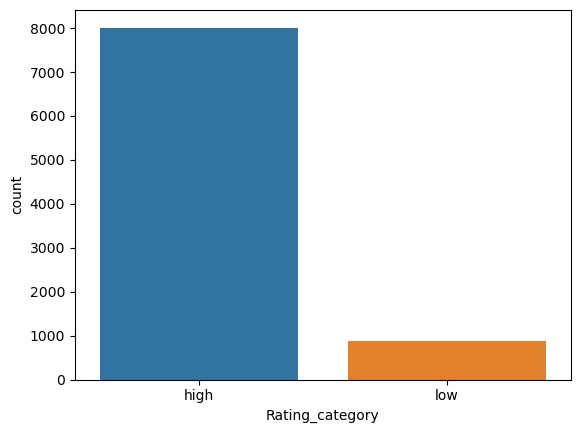

In [10]:
sns.countplot(x="Rating_category",data=data)
plt.show()

### Inference:
- The resulting plot shows the number of apps in the dataset that fall into the "high" and "low" rating categories.
- We can see from the plot that the majority of apps in the dataset are in the "high" rating category, indicating that most apps in the dataset have a rating above 3.5.

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

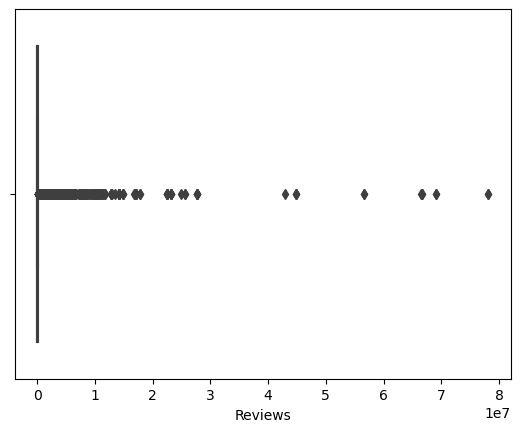

In [11]:
data["Reviews"]=pd.to_numeric(data["Reviews"],errors="coerce")
sns.boxplot(x="Reviews",data=data)
plt.show()

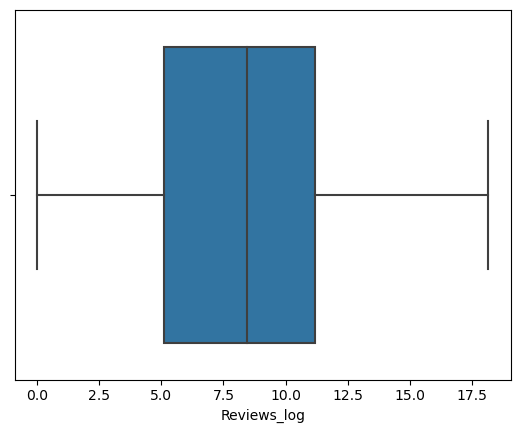

In [12]:
data["Reviews_log"]=np.log(data["Reviews"])
sns.boxplot(x="Reviews_log",data=data)
plt.show()

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [13]:
data["Size"]=data["Size"].str.replace('M','000000').str.replace('k','000')
data["Size"]=pd.to_numeric(data["Size"], errors="coerce")
data=data[data["Size"].notnull()]
print(data["Size"].describe())

count    7.424000e+03
mean     2.084848e+07
std      2.490609e+07
min      1.000000e+00
25%      5.900000e+00
50%      1.400000e+07
75%      3.300000e+07
max      1.000000e+08
Name: Size, dtype: float64


### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [14]:
print(data["Installs"])

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object


In [15]:
data["Installs"]=data["Installs"].str.replace('+', '').str.replace(',', '')
data["Installs"]=pd.to_numeric(data["Installs"], errors="coerce")
print(data["Installs"].head())

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64


### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [16]:
print(data['Price'])

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: object


In [17]:
data["Price"]=data["Price"].str.replace('$', '')
data["Price"]=pd.to_numeric(data["Price"], errors="coerce")
print(data["Price"].describe())

count    7424.000000
mean        1.116599
std        17.708566
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64


### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [18]:
print(data.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category', 'Reviews_log'],
      dtype='object')


In [19]:
data.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver','Reviews_log'],axis=1,inplace=True)
print(data.columns)

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')


### 13. Encode the categorical columns.

In [20]:
data = pd.get_dummies(data, columns=['Category','Type','Content Rating'])
data['Rating_category']=data['Rating_category'].replace({'high':1,'low':0} )
data

,Reviews,Size,Installs,Price,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,0.0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,967,14000000.0,500000,0.0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,87510,8.7,5000000,0.0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,215644,25000000.0,50000000,0.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,967,2.8,100000,0.0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44,619000.0,1000,0.0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
10834,7,2.6,500,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10836,38,53000000.0,5000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10837,4,3.6,100,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [21]:
X=data.drop(['Rating_category'],axis=1)
y=data['Rating_category']
print('X:', X.shape)
print('y:', y.shape)

X: (7424, 45)
y: (7424,)


### 15. Split the dataset into train and test.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (5939, 45)
X_test: (1485, 45)
y_train: (5939,)
y_test: (1485,)


### 16. Standardize the data, so that the values are within a particular range.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred=lr_model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9016835016835016


## PART II: Data Visualization on Honey Production dataset using seabornand matplotlib libraries.

### 1. Import required libraries and read the dataset.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [26]:
honey_data=pd.read_csv('C:\\Users\\TOFIQ\\Downloads\\honeyproduction.csv')
honey_data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [27]:
honey_data.shape

(626, 8)

In [28]:
honey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


### 3. Display the percentage distribution of the data in each year using the pie chart.

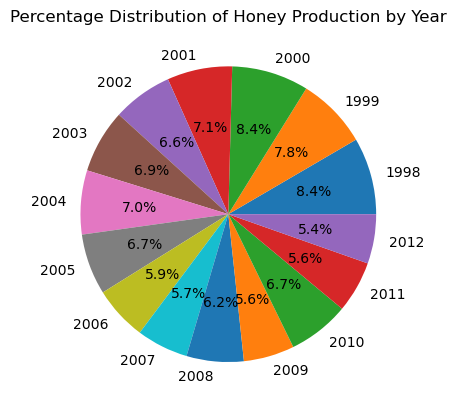

In [29]:
yearly_production=honey_data.groupby('year')['totalprod'].sum()
plt.pie(yearly_production, labels=yearly_production.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Honey Production by Year')
plt.show()

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


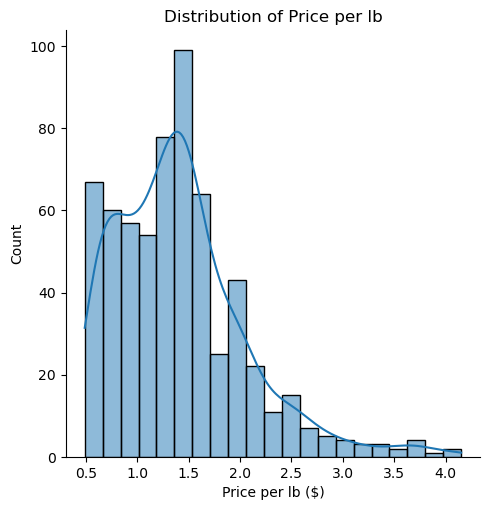

In [30]:
sns.displot(honey_data['priceperlb'], kde=True)
plt.xlabel('Price per lb ($)')
plt.title('Distribution of Price per lb')
plt.show()

#### Inferences
- Based on the plot, we can see that the distribution of the "price per lb" variable is roughly bell-shaped, with a peak around $1.4 per lb.
- The distribution is slightly skewed to the right, with a long tail towards higher prices. 
- There is also some variability in the data, with a few outliers at very high prices.

- Overall, the plot suggests that the "price per lb" variable is relatively normally distributed with some variability and outliers towards higher prices.

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


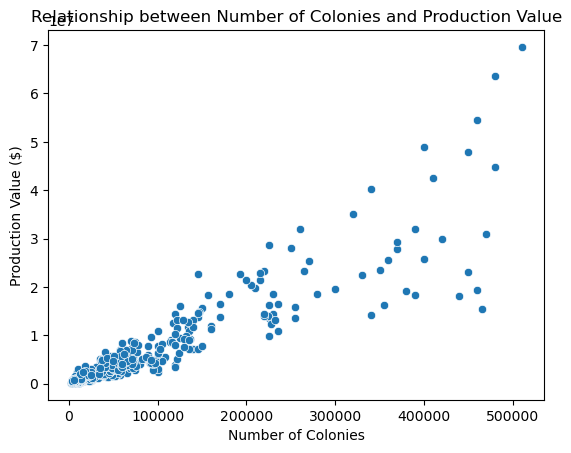

In [31]:
sns.scatterplot(x='numcol', y='prodvalue', data=honey_data)
plt.xlabel('Number of Colonies')
plt.ylabel('Production Value ($)')
plt.title('Relationship between Number of Colonies and Production Value')
plt.show()

#### Inferences
- Based on the plot, we can see that there is a positive relationship between the 'numcol' and 'prodval' variables. 
- This means that as the number of colonies increases, so does the production value. 
- The scatterplot suggests that there is a positive correlation between the 'numcol' and 'prodval' variables, and that increasing the number of colonies may lead to higher production values.

### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.


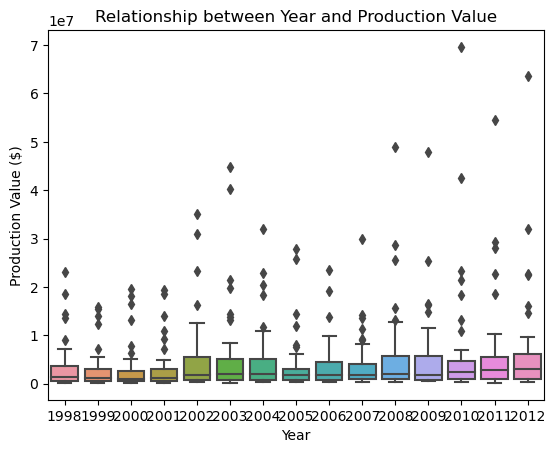

In [32]:
sns.boxplot(x='year', y='prodvalue', data=honey_data)
plt.xlabel('Year')
plt.ylabel('Production Value ($)')
plt.title('Relationship between Year and Production Value')
plt.show()

#### Inferences
- Based on the plot, we can see that the distribution of 'prodvalue' varies across different years.
- we can see that the median production value tends to increase over time, with the highest median value occurring in the most recent year (2012). 
- We can also see that the range of production values tends to increase over time, indicating greater variability in the data.
- The boxplot suggests that there may be a positive relationship between 'year' and 'prodvalue', with production values generally increasing over time.

### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

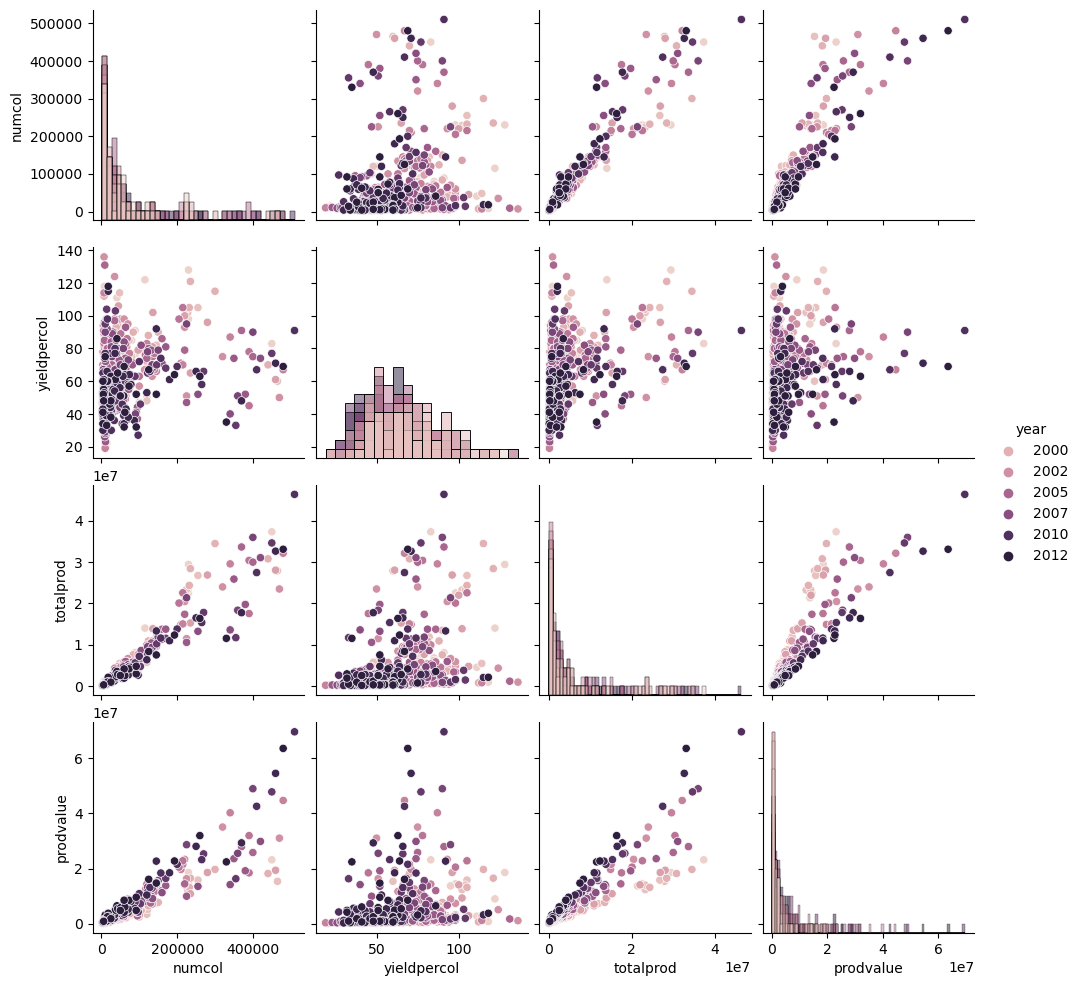

In [33]:
cols = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
sns.pairplot(data=honey_data[cols], hue='year', diag_kind='hist')
plt.show()

#### Inference
- There appears to be a positive relationship between 'numcol' and 'totalprod', with the points in each scatterplot clustering around a diagonal line.
- There is some variability in the relationship between 'numcol' and 'yieldpercol', with the strength of the relationship varying across years.
- There is a positive relationship between 'totalprod' and 'prodvalue', with the points in each scatterplot clustering around a diagonal line.
- The distribution of 'prodvalue' appears to be roughly normally distributed for each year, with some variability in the range of values.
- The distribution of 'totalprod' appears to be skewed to the right for each year, with some outliers at higher values.

### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')


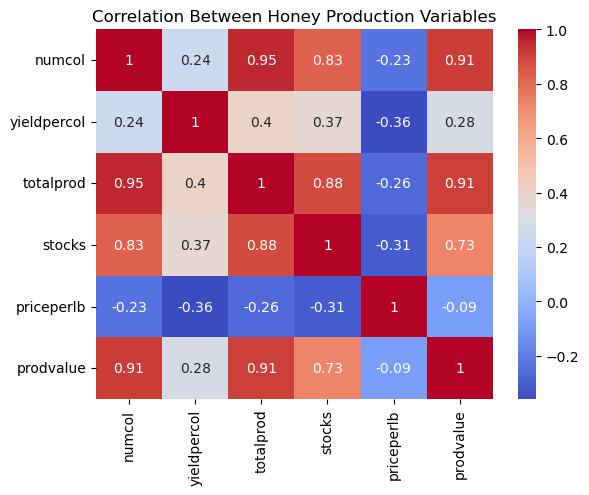

In [34]:
cols=['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']
corr_matrix=honey_data[cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Honey Production Variables')
plt.show()

#### Based on the heatmap plot, we can make the following observations:
- There is a strong positive correlation between 'totalprod' and 'prodvalue', with a correlation coefficient of 0.91.
- There is a moderate positive correlation between 'stocks' and 'prodvalue', with a correlation coefficient of 0.73.
- There is a moderate negative correlation between 'priceperlb' and 'totalprod', with a correlation coefficient of -0.26.
- There is a weak negative correlation between 'priceperlb' and 'prodvalue', with a correlation coefficient of -0.09.